In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



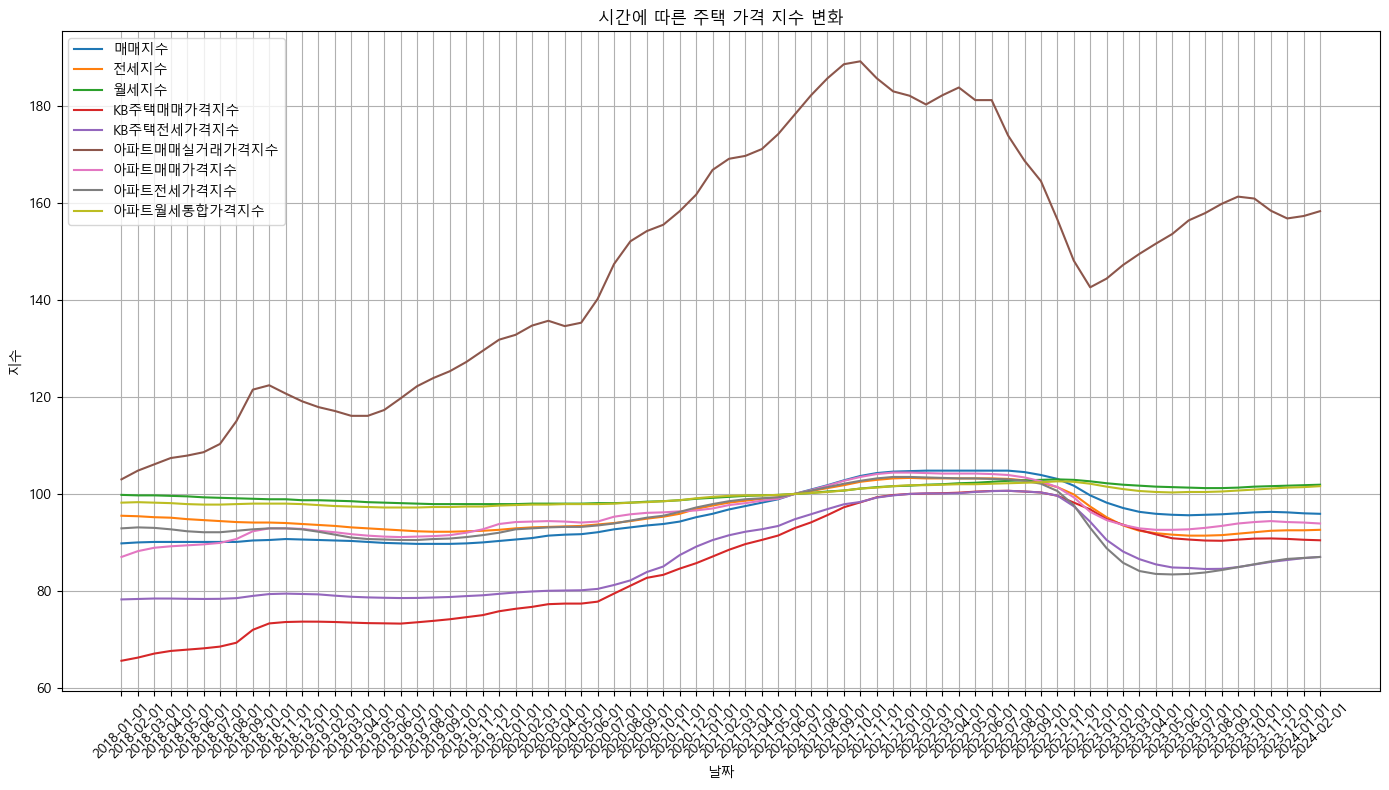

In [2]:
import matplotlib.pyplot as plt
data = pd.read_csv('0507_EDA.csv')
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(data['날짜'], data['매매지수'], label='매매지수')
plt.plot(data['날짜'], data['전세지수'], label='전세지수')
plt.plot(data['날짜'], data['월세지수'], label='월세지수')
plt.plot(data['날짜'], data['KB주택매매가격지수'], label='KB주택매매가격지수')
plt.plot(data['날짜'], data['KB주택전세가격지수'], label='KB주택전세가격지수')
plt.plot(data['날짜'], data['아파트매매실거래가격지수'], label='아파트매매실거래가격지수')
plt.plot(data['날짜'], data['아파트매매가격지수'], label='아파트매매가격지수')
plt.plot(data['날짜'], data['아파트전세가격지수'], label='아파트전세가격지수')
plt.plot(data['날짜'], data['아파트월세통합가격지수'], label='아파트월세통합가격지수')

plt.title('시간에 따른 주택 가격 지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [3]:
price_columns = ['매매지수', '전세지수', '월세지수', 'KB주택매매가격지수', 'KB주택전세가격지수',
       '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수','아파트매매실거래가격지수']

In [4]:
selected_columns = ['한국은행 기준금리', '정부대출금리',
       '국민주택채권1종(5년)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)', '소비자물가지수(전세)',
       '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션']

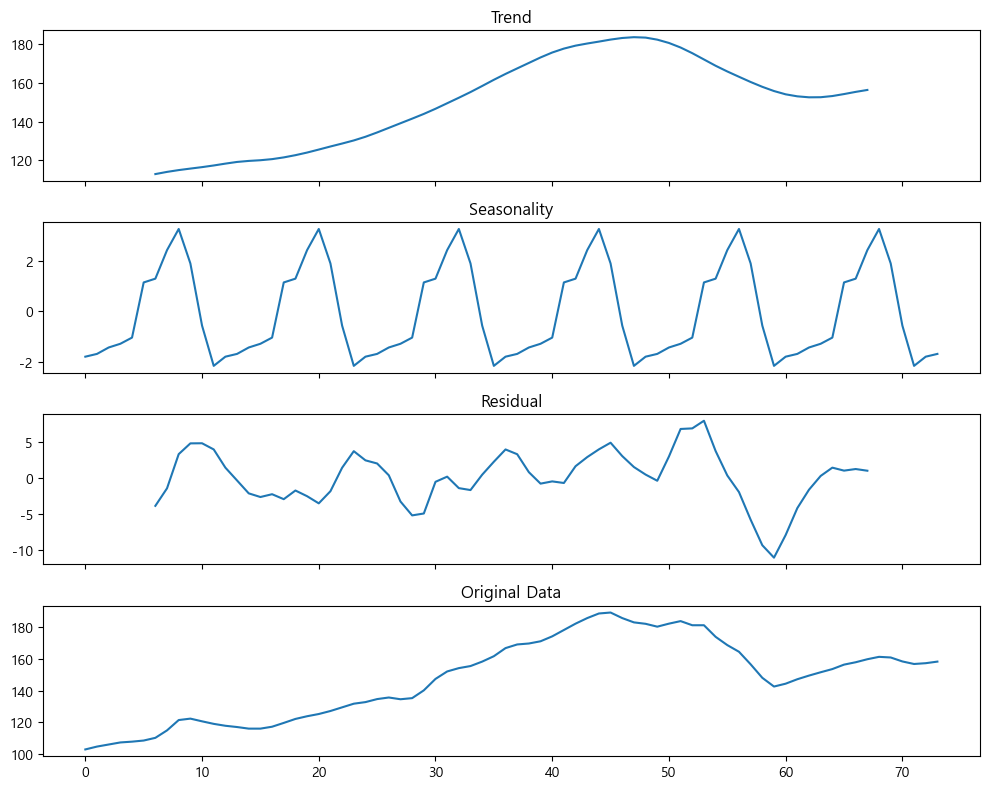

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Selecting only the price-related columns for decomposition
price_data = data[price_columns]

# Dictionary to store the decomposition results for each price-related column
price_decomposition_results = {}

# Perform seasonal decomposition for each price column
for column in price_columns:
    # Dropping any NA values for safe decomposition
    series = price_data[column].dropna()
    decomposition_result = seasonal_decompose(series, model='additive', period=12)
    price_decomposition_results[column] = decomposition_result

# Plotting the decomposition results for one of the columns as an example
example_column = '아파트매매실거래가격지수'
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 8))
price_decomposition_results[example_column].trend.plot(ax=axes[0], title='Trend')
price_decomposition_results[example_column].seasonal.plot(ax=axes[1], title='Seasonality')
price_decomposition_results[example_column].resid.plot(ax=axes[2],title='Residual')
price_data[example_column].plot(ax=axes[3], title='Original Data')
plt.tight_layout()
plt.show()


In [6]:
# Let's analyze the trends, seasonality, and residuals from the decomposed components for '매매지수' in more detail
# First, let's extract each component for '매매지수'
trend = price_decomposition_results['아파트매매실거래가격지수'].trend
seasonal = price_decomposition_results['아파트매매실거래가격지수'].seasonal
resid = price_decomposition_results['아파트매매실거래가격지수'].resid
original = price_data['아파트매매실거래가격지수']

# Now, let's create a summary of insights based on these components
# We will look for trends in the trend data, typical seasonal patterns, and any notable residuals

# Check for overall trend direction over time
overall_trend = trend.dropna().diff().describe()

# Seasonal patterns
seasonal_pattern = seasonal.describe()

# Residual analysis
residual_analysis = resid.describe()

# Summarize the original data trends as well
original_data_trend = original.describe()

overall_trend, seasonal_pattern, residual_analysis, original_data_trend


(count    61.000000
 mean      0.713115
 std       1.849004
 min      -3.254167
 25%       0.045833
 50%       1.000000
 75%       2.225000
 max       3.204167
 Name: trend, dtype: float64,
 count    74.000000
 mean     -0.047325
 std       1.817012
 min      -2.171019
 25%      -1.696019
 50%      -1.048519
 75%       1.292731
 max       3.267315
 Name: seasonal, dtype: float64,
 count    62.000000
 mean      0.092685
 std       3.718095
 min     -11.020648
 25%      -1.908148
 50%       0.373449
 75%       2.793414
 max       7.940185
 Name: resid, dtype: float64,
 count     74.000000
 mean     147.506757
 std       25.401345
 min      103.000000
 25%      122.775000
 50%      151.850000
 75%      168.225000
 max      189.200000
 Name: 아파트매매실거래가격지수, dtype: float64)

In [7]:
# Analyzing outliers in the residuals to find any external events or anomalies that could explain significant deviations
# First, we will define what constitutes an outlier in the residuals
# Common approach is to use mean ± 2*standard deviation for outlier detection

residual_mean = resid.mean()
residual_std = resid.std()

# Define outliers as points more than 2 standard deviations from the mean
outlier_threshold_upper = residual_mean + 2 * residual_std
outlier_threshold_lower = residual_mean - 2 * residual_std

# Identify the outliers
outliers = resid[(resid > outlier_threshold_upper) | (resid < outlier_threshold_lower)]

# Display the dates and values of these outliers
outlier_dates = outliers.index
outlier_values = outliers.values

outliers_df = pd.DataFrame({
    'Date': outlier_dates,
    'Residual': outlier_values
})

outliers_df


,Date,Residual
0,53,7.940185
1,58,-9.303148
2,59,-11.020648
3,60,-7.885648


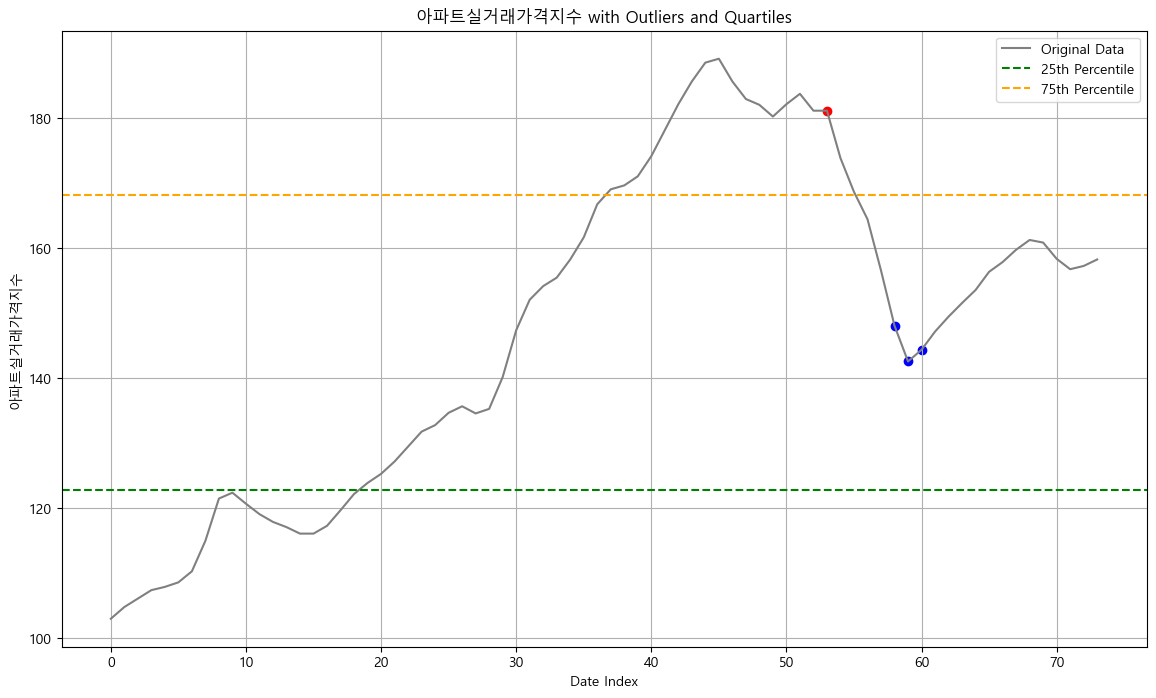

In [8]:
import matplotlib.pyplot as plt

# Visualizing the original data with the identified outliers highlighted and quartile information

# Plot the original data
plt.figure(figsize=(14, 8))
plt.plot(price_data.index, original, label='Original Data', color='grey')

# Highlight the outliers in the residuals
for date, value in outliers.items():
    if value > 0:
        plt.scatter(date, original[date], color='red', label='Positive Outlier' if date == 55 else "")  # Red for positive
    else:
        plt.scatter(date, original[date], color='blue', label='Negative Outlier' if date == 61 else "")  # Blue for negative

# Quartile calculations
q25 = original.quantile(0.25)
q75 = original.quantile(0.75)

# Highlight the quartiles
plt.axhline(q25, color='green', linestyle='--', label='25th Percentile')
plt.axhline(q75, color='orange', linestyle='--', label='75th Percentile')

plt.title('아파트실거래가격지수 with Outliers and Quartiles')
plt.xlabel('Date Index')
plt.ylabel('아파트실거래가격지수')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 로드
data = pd.read_csv('0507_EDA.csv')

# 날짜 형식 변환 및 인덱스 설정|
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)


2. 계절성 분해

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2018-01-01 to 2024-02-01
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   매매지수            74 non-null     float64
 1   전세지수            74 non-null     float64
 2   월세지수            74 non-null     float64
 3   KB주택매매가격지수      74 non-null     float64
 4   KB주택전세가격지수      74 non-null     float64
 5   아파트매매실거래가격지수    74 non-null     float64
 6   아파트매매가격지수       74 non-null     float64
 7   아파트전세가격지수       74 non-null     float64
 8   아파트월세통합가격지수     74 non-null     float64
 9   한국은행 기준금리       74 non-null     float64
 10  정부대출금리          74 non-null     float64
 11  국민주택채권1종(5년)    74 non-null     float64
 12  소비자물가지수(총지수)    74 non-null     float64
 13  소비자물가지수(주택임차료)  74 non-null     float64
 14  소비자물가지수(전세)     74 non-null     float64
 15  소비자물가지수(월세)     74 non-null     float64
 16  생산자물가지수         74 non-null     float64
 17  수입물가지수          7

In [12]:
# 계절성 분해를 원하는 열 선택
column = '아파트매매실거래가격지수'  # 다른 열 이름으로 변경 가능
series = data[column].dropna()  # NA 값 제거

# 계절성 분해 실행
decomposition_result = seasonal_decompose(series, model='additive', period=12)

# 분해 결과 추출
trend = decomposition_result.trend
seasonal = decomposition_result.seasonal
resid = decomposition_result.resid


3. 각 구성 요소 시각화

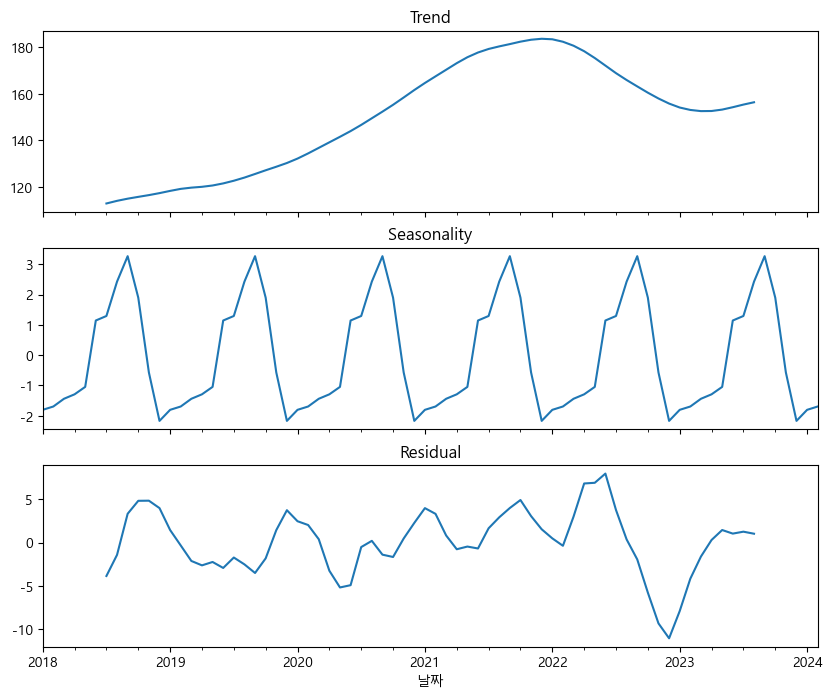

In [13]:
# 추세, 계절성, 잔차 시각화
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
trend.plot(ax=axes[0], title='Trend')
seasonal.plot(ax=axes[1], title='Seasonality')
resid.plot(ax=axes[2], title='Residual')
plt.show()


4. 데이터 통계 분석 및 인사이트

In [14]:
# 데이터의 통계적 요약
print(series.describe())

# 추세의 변화 분석
print(trend.diff().describe())

# 계절성 및 잔차의 통계적 요약
print(seasonal.describe())
print(resid.describe())


count     74.000000
mean     147.506757
std       25.401345
min      103.000000
25%      122.775000
50%      151.850000
75%      168.225000
max      189.200000
Name: 아파트매매실거래가격지수, dtype: float64
count    61.000000
mean      0.713115
std       1.849004
min      -3.254167
25%       0.045833
50%       1.000000
75%       2.225000
max       3.204167
Name: trend, dtype: float64
count    74.000000
mean     -0.047325
std       1.817012
min      -2.171019
25%      -1.696019
50%      -1.048519
75%       1.292731
max       3.267315
Name: seasonal, dtype: float64
count    62.000000
mean      0.092685
std       3.718095
min     -11.020648
25%      -1.908148
50%       0.373449
75%       2.793414
max       7.940185
Name: resid, dtype: float64


5. 이상치 분석

In [15]:
# 이상치 정의 및 탐지
residual_mean = resid.mean()
residual_std = resid.std()
outliers = resid[(resid > residual_mean + 2 * residual_std) | (resid < residual_mean - 2 * residual_std)]


6. 이상치 및 사분위수를 포함한 시각화

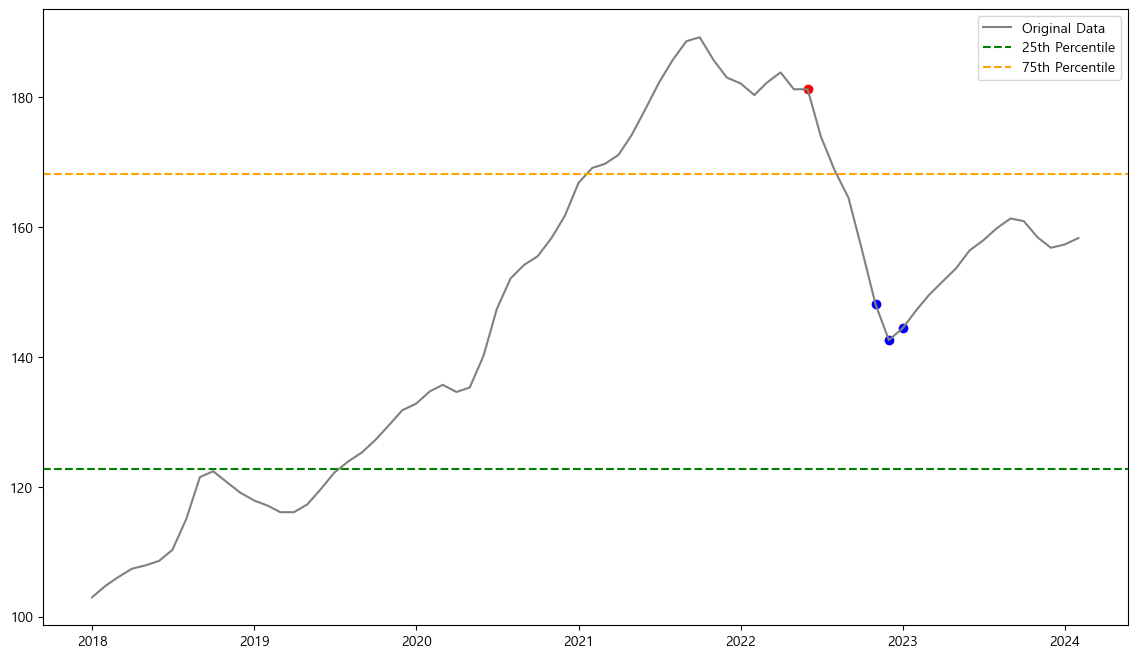

In [25]:
# 전체 데이터 및 이상치 시각화
plt.figure(figsize=(14, 8))
plt.plot(data.index, series, label='Original Data', color='grey')
for date in outliers.index:
    plt.scatter(date, series.loc[date], color='red' if outliers[date] > 0 else 'blue')
plt.axhline(series.quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axhline(series.quantile(0.75), color='orange', linestyle='--', label='75th Percentile')
plt.legend()
plt.show()


7. 상자 그림 및 히스토그램 그리기

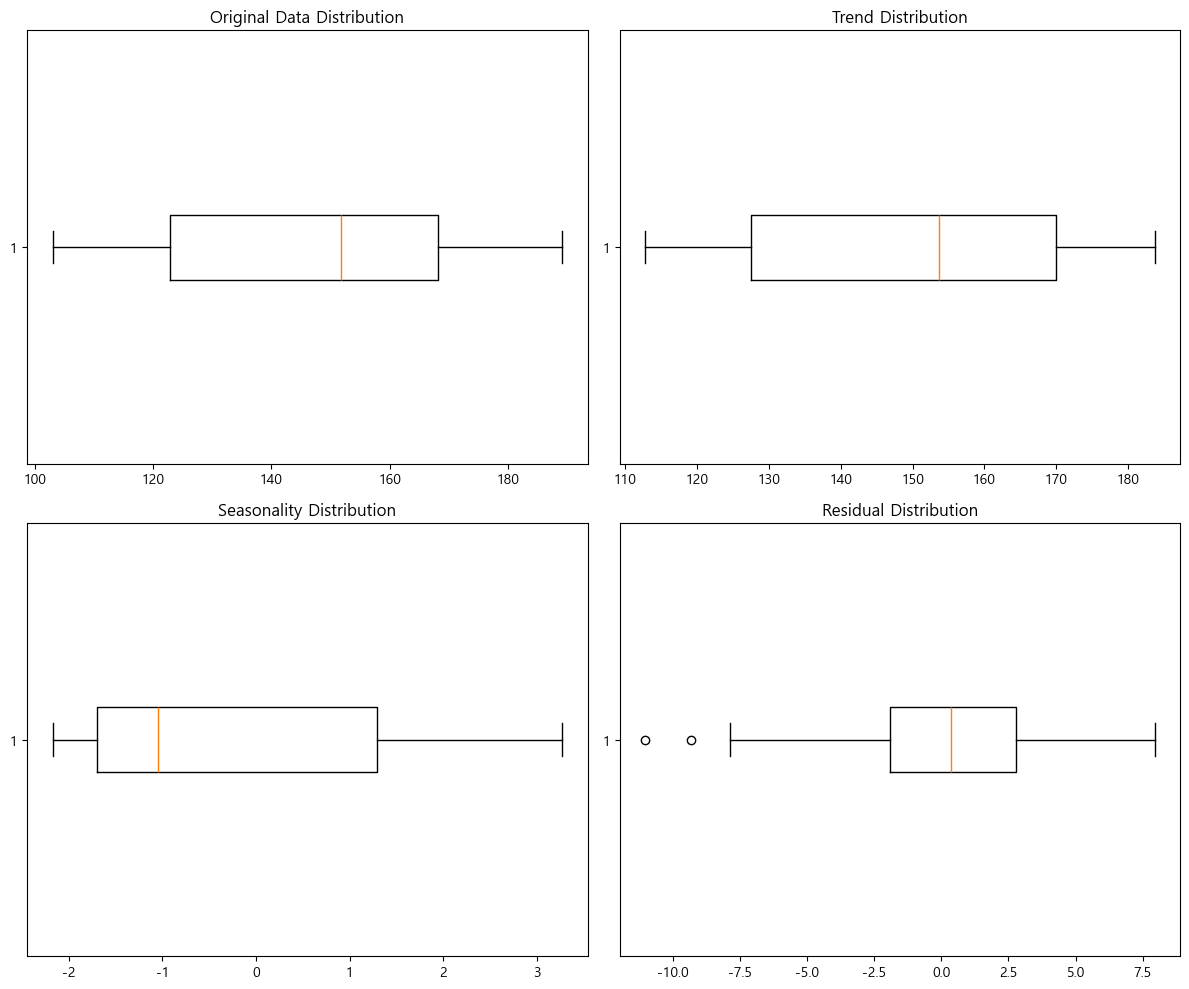

In [27]:
import matplotlib.pyplot as plt

# 각 구성 요소에 대한 상자 그림
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 원본 데이터
axes[0].boxplot(series.dropna(), vert=False)
axes[0].set_title('Original Data Distribution')

# 추세 데이터
axes[1].boxplot(trend.dropna(), vert=False)
axes[1].set_title('Trend Distribution')

# 계절성 데이터
axes[2].boxplot(seasonal.dropna(), vert=False)
axes[2].set_title('Seasonality Distribution')

# 잔차 데이터
axes[3].boxplot(resid.dropna(), vert=False)
axes[3].set_title('Residual Distribution')

plt.tight_layout()
plt.show()


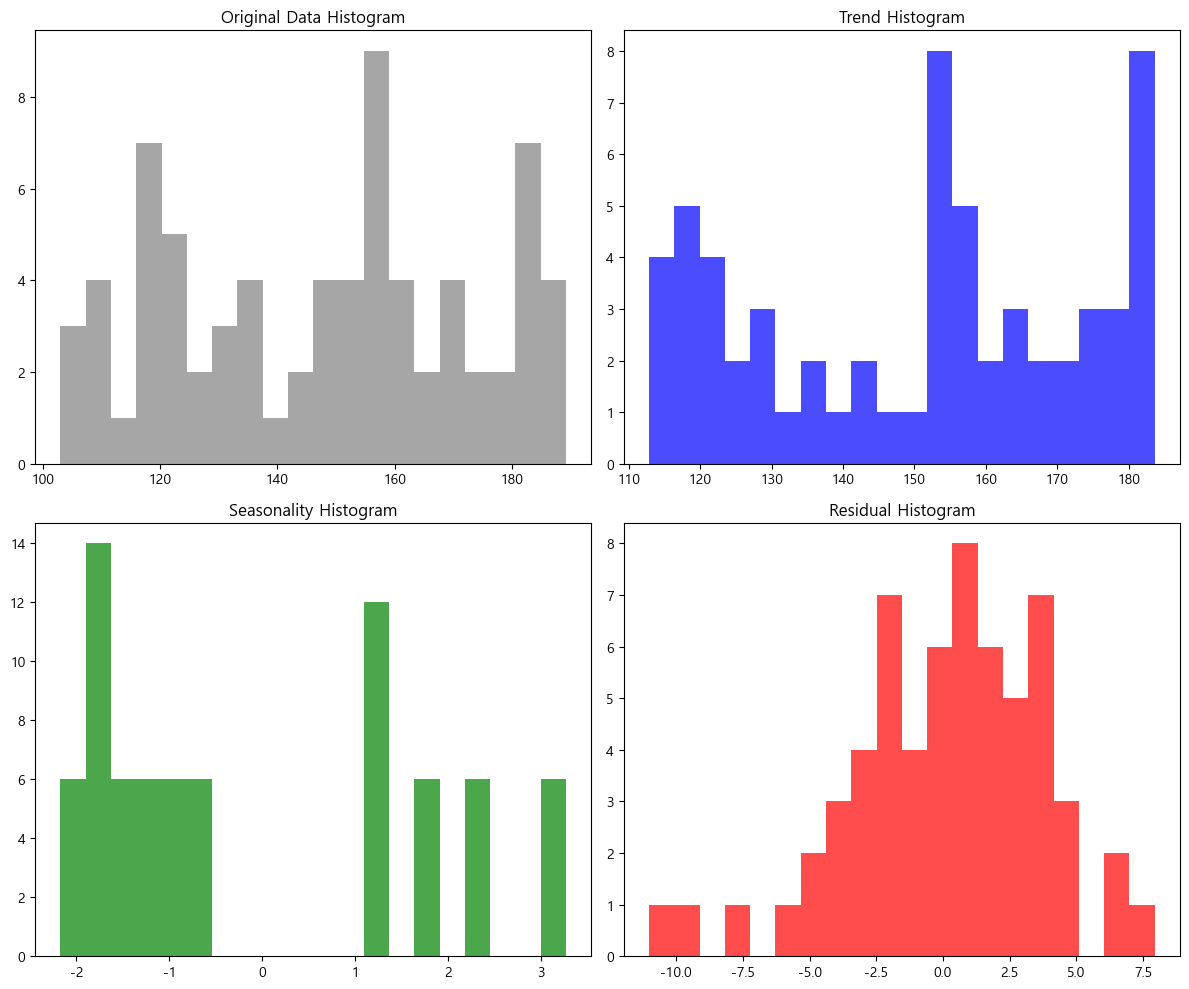

In [28]:

# 각 구성 요소에 대한 히스토그램
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 원본 데이터
axes[0].hist(series.dropna(), bins=20, color='gray', alpha=0.7)
axes[0].set_title('Original Data Histogram')

# 추세 데이터
axes[1].hist(trend.dropna(), bins=20, color='blue', alpha=0.7)
axes[1].set_title('Trend Histogram')

# 계절성 데이터
axes[2].hist(seasonal.dropna(), bins=20, color='green', alpha=0.7)
axes[2].set_title('Seasonality Histogram')

# 잔차 데이터
axes[3].hist(resid.dropna(), bins=20, color='red', alpha=0.7)
axes[3].set_title('Residual Histogram')

plt.tight_layout()
plt.show()


ADF Test for '아파트매매실거래가격':
ADF Statistic: -1.790998
p-value: 0.384940
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


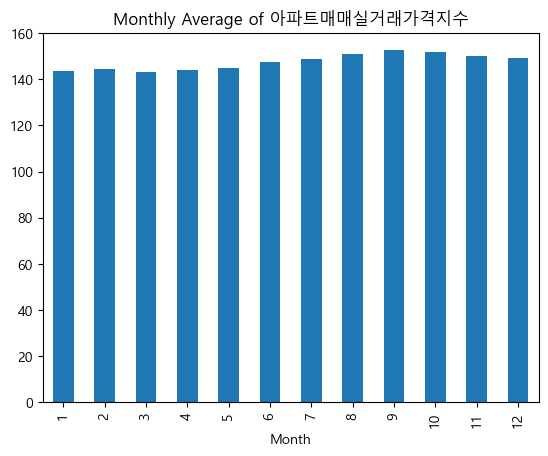

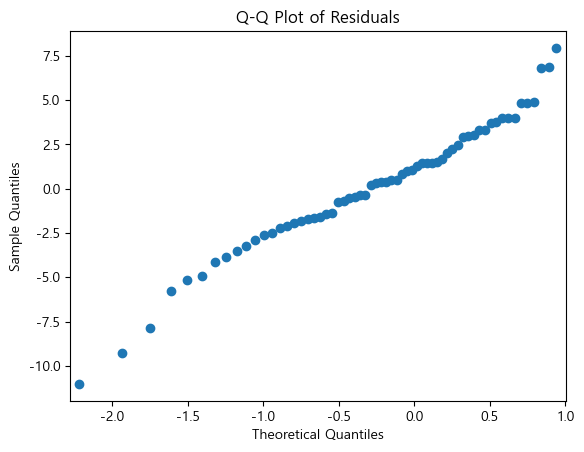

Statistics=0.978, p=0.314
Sample looks Gaussian (fail to reject H0)


In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# 1. ADF 검정: 시계열 데이터의 정상성 검사
def adf_test(series):
    result = adfuller(series.dropna())  # NaN 값 제거 후 검정
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# '아파트매매실거래가격' 열에 대한 ADF 검정 수행
print("ADF Test for '아파트매매실거래가격':")
adf_test(data['아파트매매실거래가격지수'])

# 2. 계절성 분석: 계절별 평균 가격 비교
data['Month'] = data.index.month
seasonal_means = data.groupby('Month')['아파트매매실거래가격지수'].mean()
seasonal_means.plot(kind='bar')
plt.title('Monthly Average of 아파트매매실거래가격지수')
plt.show()





# 3. 잔차 분석: 잔차의 정규성 검증
# 잔차 데이터 로드
# 이 부분은 위에서 수행한 계절 분해로부터 잔차 데이터를 로딩해야 합니다.
residuals = price_decomposition_results[example_column].resid

# Q-Q 플롯을 사용하여 잔차의 정규성 검사
qqplot(residuals.values, line='s')  # '잔차'는 실제 잔차 열 이름으로 대체해야 함
plt.title('Q-Q Plot of Residuals')
plt.show()

# 샤피로-윌크 테스트를 통한 정규성 검사
stat, p = shapiro(residuals.dropna())  # NaN 값 제거
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


ADF Statistic: -1.7909982009032028
p-value: 0.3849399065584807
Critical Values:
    1%: -3.525
    5%: -2.903
    10%: -2.589
KPSS Statistic: 0.9012738246573493
p-value: 0.01
Critical Values:
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739


C:\Users\Jeonbaekchan\AppData\Local\Temp\ipykernel_11460\3051599321.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')


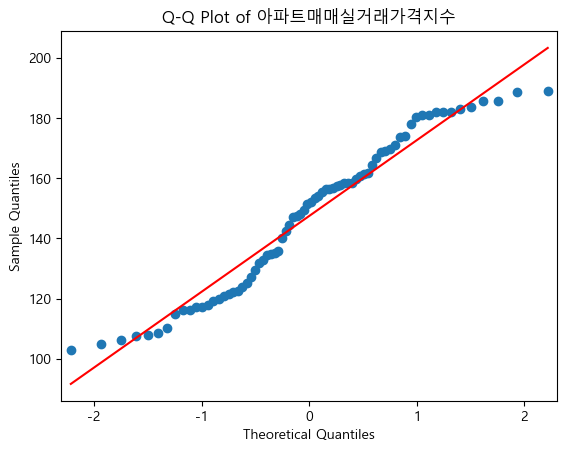

Statistics=0.954, p=0.052
Sample looks Gaussian (fail to reject H0)


In [78]:
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로드
data = pd.read_csv('0507_EDA.csv')
# '아파트매매실거래가격지수' 열에 대한 전처리
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)
series = data['아파트매매실거래가격지수']

# ADF 검정
adf_result = adfuller(series.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f'    {key}: {value:.3f}')

# KPSS 검정
kpss_result = kpss(series.dropna(), regression='c')
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:")
for key, value in kpss_result[3].items():
    print(f'    {key}: {value:.3f}')

# 잔차의 정규성 검사
qqplot(series.dropna(), line='s')
plt.title('Q-Q Plot of 아파트매매실거래가격지수')
plt.show()

stat, p = shapiro(series.dropna()[-50:])  # 최신 50개 데이터로 정규성 검사
print(f'Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')



ADF Test after Differencing
ADF Statistic: -3.808572647867041
p-value: 0.002820813384600738


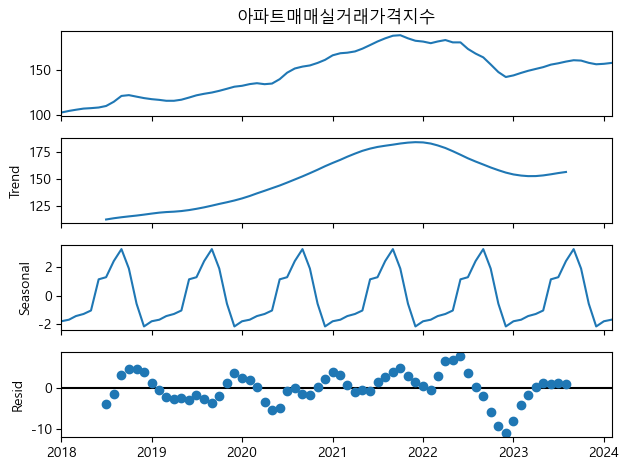

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       아파트매매실거래가격지수   No. Observations:                   74
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -135.878
Date:                            Wed, 08 May 2024   AIC                            281.757
Time:                                    18:15:53   BIC                            292.311
Sample:                                01-01-2018   HQIC                           285.893
                                     - 02-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6518      0.120      5.415      0.000       0.416       0.888
ma.L1          0.2597      0.183   

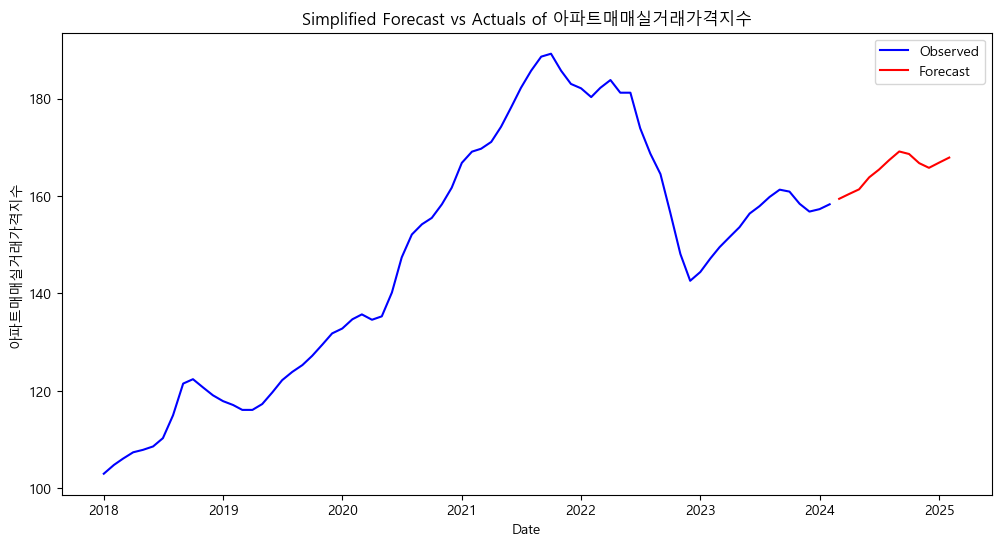

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 로드
data = pd.read_csv('0507_EDA.csv')
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)
series = data['아파트매매실거래가격지수']

# 데이터 차분을 통한 정상화 시도
data_diff = series.diff().dropna()

# 차분 데이터에 대한 ADF 검정
adf_result_diff = adfuller(data_diff)
print("ADF Test after Differencing")
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"p-value: {adf_result_diff[1]}")

# 시계열 분해를 통한 시각화
decomposed = seasonal_decompose(series, model='additive', period=12)
fig = decomposed.plot()
plt.show()

# SARIMA 모델 피팅
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)
print(results.summary())

# 예측
forecast = results.get_forecast(steps=12)

# 예측 결과를 간단한 선 그래프로 시각화
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series.index, series, label='Observed', color='blue')  # 실제 데이터
ax.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')  # 예측 데이터

ax.set_title('Simplified Forecast vs Actuals of 아파트매매실거래가격지수')
ax.set_xlabel('Date')
ax.set_ylabel('아파트매매실거래가격지수')
ax.legend()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


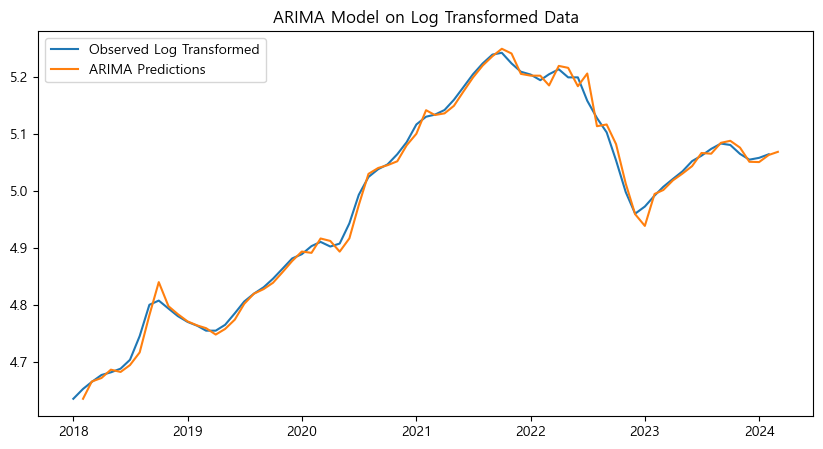

In [35]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data = pd.read_csv('0507_EDA.csv')
# 데이터 로드 및 인덱스 설정 (이전 코드 참조)
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)
series = data['아파트매매실거래가격지수']

# 로그 변환 적용
log_series = np.log(series)

# ARIMA 모델 피팅 (p, d, q를 적당히 선택)
model = ARIMA(log_series, order=(1,1,1))
results = model.fit()

# 예측 결과 플로팅
plt.figure(figsize=(10, 5))
plt.plot(log_series, label='Observed Log Transformed')
plt.plot(results.predict(start=1, end=len(log_series), typ='levels'), label='ARIMA Predictions')
plt.title('ARIMA Model on Log Transformed Data')
plt.legend()
plt.show()


In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           아파트매매실거래가격지수   No. Observations:                   74
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 213.770
Date:                Wed, 08 May 2024   AIC                           -421.541
Time:                        17:07:11   BIC                           -414.670
Sample:                    01-01-2018   HQIC                          -418.803
                         - 02-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5789      0.095      6.101      0.000       0.393       0.765
ma.L1          0.4359      0.107      4.081      0.000       0.227       0.645
sigma2         0.0002   1.93e-05      8.571      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                32.55
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.81
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


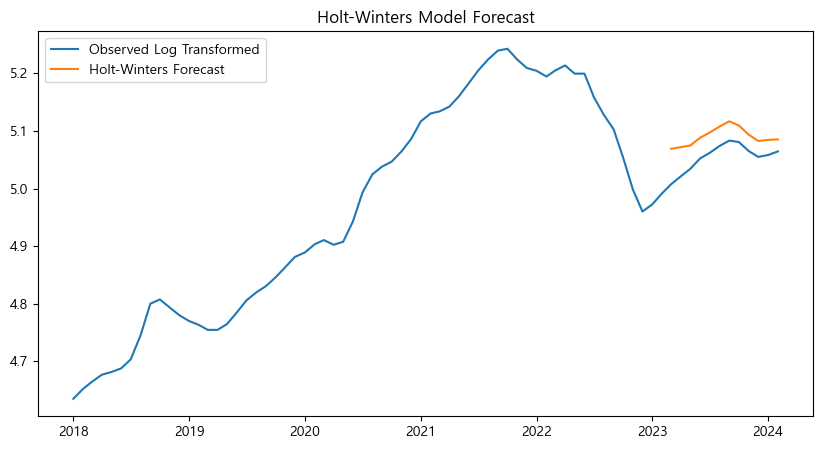

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters 모델 피팅
hw_model = ExponentialSmoothing(log_series, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True).fit()

# 예측 결과
hw_forecast = hw_model.forecast(12)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(log_series, label='Observed Log Transformed')
plt.plot(log_series.index[-len(hw_forecast):], hw_forecast, label='Holt-Winters Forecast')
plt.title('Holt-Winters Model Forecast')
plt.legend()
plt.show()


In [39]:
hw_model.summary()

Dep. Variable:,아파트매매실거래가격지수,No. Observations:,74
Model:,ExponentialSmoothing,SSE,0.010
Optimized:,True,AIC,-625.337
Trend:,Additive,BIC,-586.168
Seasonal:,Additive,AICC,-611.263
Seasonal Periods:,12,Date:,"Wed, 08 May 2024"
Box-Cox:,False,Time:,17:14:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,1.0000000,beta,True


In [42]:
import pandas as pd

data = pd.read_csv('0507_EDA.csv')
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)
data =data[['아파트매매실거래가격지수','한국은행 기준금리', '정부대출금리',
       '국민주택채권1종(5년)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)', '소비자물가지수(전세)',
       '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션']]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2018-01-01 to 2024-02-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   아파트매매실거래가격지수    74 non-null     float64
 1   한국은행 기준금리       74 non-null     float64
 2   정부대출금리          74 non-null     float64
 3   국민주택채권1종(5년)    74 non-null     float64
 4   소비자물가지수(총지수)    74 non-null     float64
 5   소비자물가지수(주택임차료)  74 non-null     float64
 6   소비자물가지수(전세)     74 non-null     float64
 7   소비자물가지수(월세)     74 non-null     float64
 8   생산자물가지수         74 non-null     float64
 9   수입물가지수          74 non-null     float64
 10  수출물가지수          74 non-null     float64
 11  기대인플레이션         74 non-null     float64
dtypes: float64(12)
memory usage: 7.5 KB


In [45]:
data.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [49]:
data

,아파트매매실거래가격지수,한국은행 기준금리,정부대출금리,국민주택채권1종(5년),소비자물가지수(총지수),소비자물가지수(주택임차료),소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션
날짜,,,,,,,,,,,,
2018-01-01,103.0,1.5,1.638,2.598682,98.106,99.725,99.051,100.482,102.52,101.04,103.37,2.5
2018-02-01,104.8,1.5,1.638,2.702944,98.855,99.792,99.171,100.472,102.95,102.27,103.84,2.5
2018-03-01,106.1,1.5,1.638,2.688143,98.751,99.821,99.282,100.422,102.91,100.82,104.39,2.5
2018-04-01,107.4,1.5,1.651,2.611524,98.931,99.859,99.402,100.382,103.04,101.00,105.53,2.5
2018-05-01,107.9,1.5,1.651,2.690850,98.979,99.898,99.486,100.352,103.34,102.75,108.64,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,160.9,3.5,3.706,4.485263,113.260,103.660,104.480,102.650,121.56,120.34,140.90,4.1
2023-11-01,158.4,3.5,3.706,4.116864,112.670,103.740,104.550,102.730,121.02,116.16,134.75,4.1
2023-12-01,156.8,3.5,3.706,3.635950,112.710,103.740,104.470,102.810,121.19,114.95,132.52,3.9


In [51]:
data.columns

Index(['아파트매매실거래가격지수', '한국은행 기준금리', '정부대출금리', '국민주택채권1종(5년)', '소비자물가지수(총지수)',
       '소비자물가지수(주택임차료)', '소비자물가지수(전세)', '소비자물가지수(월세)', '생산자물가지수', '수입물가지수',
       '수출물가지수', '기대인플레이션'],
      dtype='object')

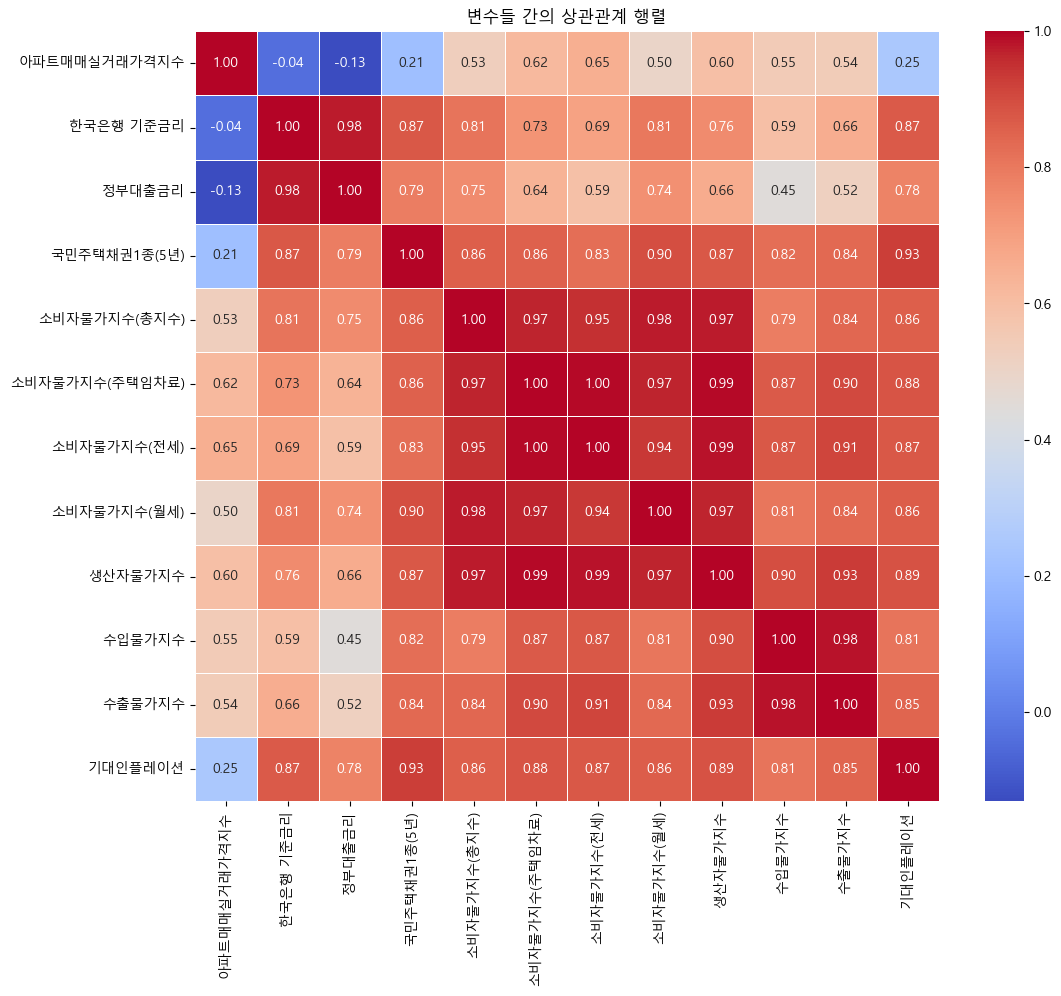

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 분석
correlation = data.corr()

# 상관관계 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('변수들 간의 상관관계 행렬')
plt.show()


In [77]:
data.columns

Index(['날짜', '매매지수', '전세지수', '월세지수', 'KB주택매매가격지수', 'KB주택전세가격지수',
       '아파트매매실거래가격지수', '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수', '한국은행 기준금리',
       '정부대출금리', '국민주택채권1종(5년)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)',
       '소비자물가지수(전세)', '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션'],
      dtype='object')

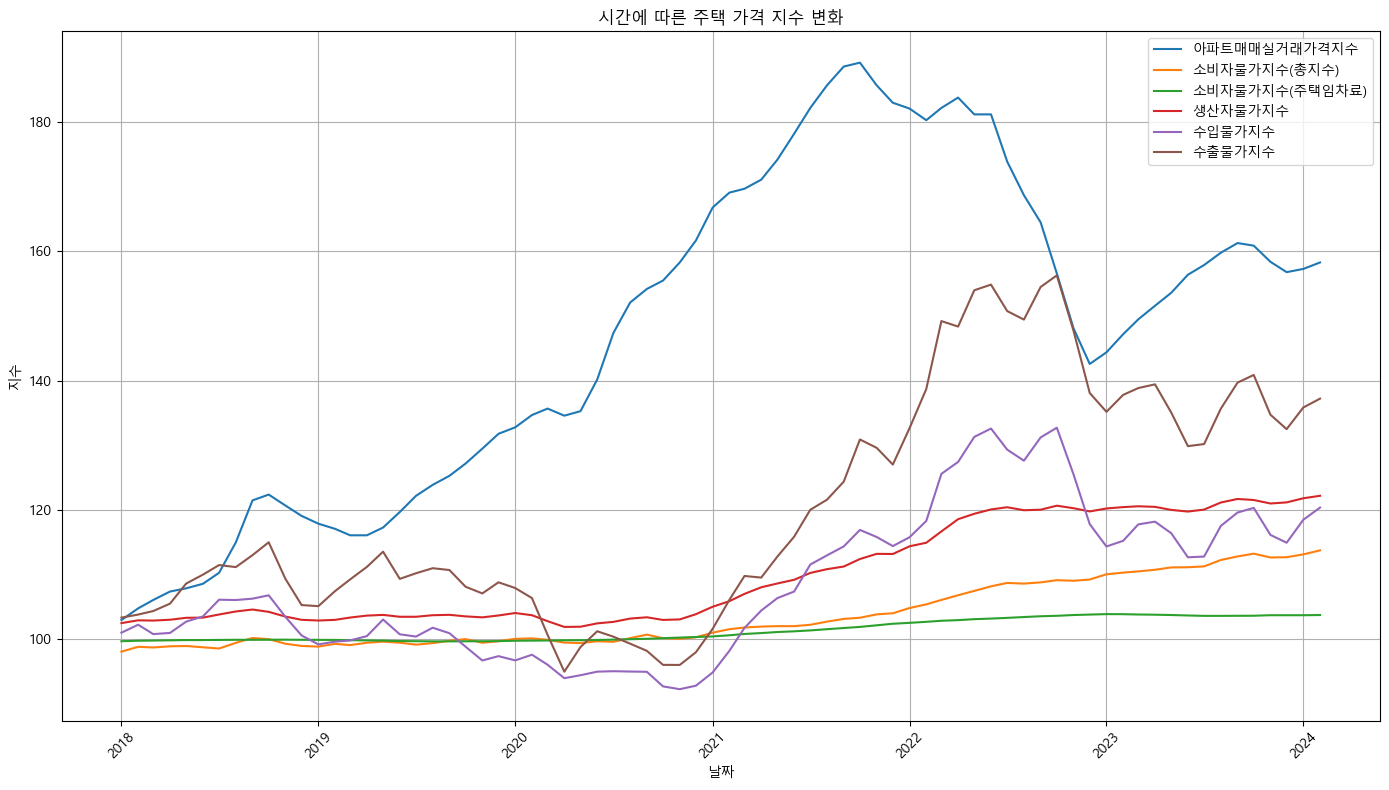

In [88]:
import matplotlib.pyplot as plt
X = data[['아파트매매실거래가격지수', '소비자물가지수(총지수)','소비자물가지수(주택임차료)', '생산자물가지수','수입물가지수', '수출물가지수']]
# Plotting
plt.figure(figsize=(14, 8))
for x in X:
    plt.plot(data.index, data[x], label=x)
    

plt.title('시간에 따른 주택 가격 지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


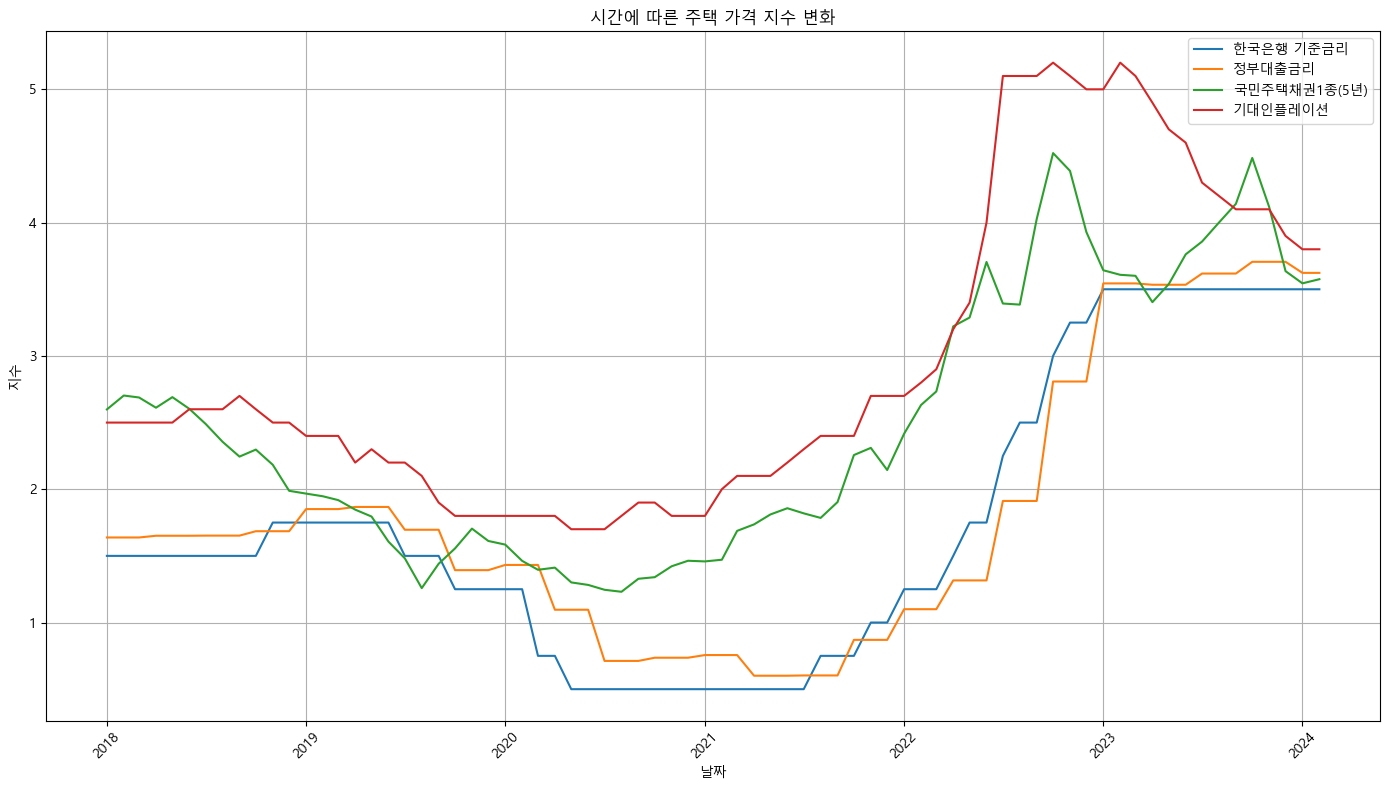

In [84]:
import matplotlib.pyplot as plt
X = data[['한국은행 기준금리', '정부대출금리', '국민주택채권1종(5년)', '기대인플레이션']]
# Plotting
plt.figure(figsize=(14, 8))
for x in X:
    plt.plot(data.index, data[x], label=x)
    

plt.title('시간에 따른 주택 가격 지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [111]:
data

,날짜,매매지수,전세지수,월세지수,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,...,정부대출금리,국민주택채권1종(5년),소비자물가지수(총지수),소비자물가지수(주택임차료),소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션
0,2018-01-01,89.8,95.5,99.8,65.602,78.247,103.0,87.0,92.9,98.2,...,1.638,2.598682,98.106,99.725,99.051,100.482,102.52,101.04,103.37,2.5
1,2018-02-01,90.0,95.4,99.7,66.249,78.341,104.8,88.2,93.1,98.3,...,1.638,2.702944,98.855,99.792,99.171,100.472,102.95,102.27,103.84,2.5
2,2018-03-01,90.1,95.2,99.7,67.080,78.433,106.1,88.9,93.0,98.2,...,1.638,2.688143,98.751,99.821,99.282,100.422,102.91,100.82,104.39,2.5
3,2018-04-01,90.1,95.1,99.6,67.624,78.427,107.4,89.2,92.7,98.1,...,1.651,2.611524,98.931,99.859,99.402,100.382,103.04,101.00,105.53,2.5
4,2018-05-01,90.1,94.8,99.5,67.893,78.372,107.9,89.4,92.3,97.9,...,1.651,2.690850,98.979,99.898,99.486,100.352,103.34,102.75,108.64,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023-10-01,96.2,92.1,101.5,90.787,85.442,160.9,94.2,85.5,100.9,...,3.706,4.485263,113.260,103.660,104.480,102.650,121.56,120.34,140.90,4.1
70,2023-11-01,96.3,92.4,101.6,90.821,85.976,158.4,94.4,86.1,101.1,...,3.706,4.116864,112.670,103.740,104.550,102.730,121.02,116.16,134.75,4.1
71,2023-12-01,96.2,92.5,101.7,90.725,86.378,156.8,94.2,86.6,101.3,...,3.706,3.635950,112.710,103.740,104.470,102.810,121.19,114.95,132.52,3.9
72,2024-01-01,96.0,92.5,101.8,90.551,86.767,157.3,94.1,86.8,101.4,...,3.623,3.544455,113.150,103.740,104.420,102.870,121.83,118.51,135.87,3.8


In [112]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv('0507_EDA.csv')
# 데이터 로드 및 인덱스 설정 (이전 코드 참조)
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)
# 독립 변수와 종속 변수 설정
X = data[['한국은행 기준금리', '정부대출금리', '국민주택채권1종(5년)', '소비자물가지수(총지수)', 
         '소비자물가지수(주택임차료)', '생산자물가지수', 
         '수입물가지수', '수출물가지수', '기대인플레이션']]
y = data['아파트매매실거래가격지수']

# 상수항 추가
X = sm.add_constant(X)

# 다중공선성 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


In [115]:
data

,매매지수,전세지수,월세지수,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,정부대출금리,국민주택채권1종(5년),소비자물가지수(총지수),소비자물가지수(주택임차료),소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션
날짜,,,,,,,,,,,,,,,,,,,,
2018-01-01,89.8,95.5,99.8,65.602,78.247,103.0,87.0,92.9,98.2,1.5,1.638,2.598682,98.106,99.725,99.051,100.482,102.52,101.04,103.37,2.5
2018-02-01,90.0,95.4,99.7,66.249,78.341,104.8,88.2,93.1,98.3,1.5,1.638,2.702944,98.855,99.792,99.171,100.472,102.95,102.27,103.84,2.5
2018-03-01,90.1,95.2,99.7,67.080,78.433,106.1,88.9,93.0,98.2,1.5,1.638,2.688143,98.751,99.821,99.282,100.422,102.91,100.82,104.39,2.5
2018-04-01,90.1,95.1,99.6,67.624,78.427,107.4,89.2,92.7,98.1,1.5,1.651,2.611524,98.931,99.859,99.402,100.382,103.04,101.00,105.53,2.5
2018-05-01,90.1,94.8,99.5,67.893,78.372,107.9,89.4,92.3,97.9,1.5,1.651,2.690850,98.979,99.898,99.486,100.352,103.34,102.75,108.64,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,96.2,92.1,101.5,90.787,85.442,160.9,94.2,85.5,100.9,3.5,3.706,4.485263,113.260,103.660,104.480,102.650,121.56,120.34,140.90,4.1
2023-11-01,96.3,92.4,101.6,90.821,85.976,158.4,94.4,86.1,101.1,3.5,3.706,4.116864,112.670,103.740,104.550,102.730,121.02,116.16,134.75,4.1
2023-12-01,96.2,92.5,101.7,90.725,86.378,156.8,94.2,86.6,101.3,3.5,3.706,3.635950,112.710,103.740,104.470,102.810,121.19,114.95,132.52,3.9


In [113]:
vif

,VIF Factor,features
0,398630.837198,const
1,92.961706,한국은행 기준금리
2,73.899128,정부대출금리
3,14.109333,국민주택채권1종(5년)
4,122.800134,소비자물가지수(총지수)
5,176.451833,소비자물가지수(주택임차료)
6,556.983366,생산자물가지수
7,66.139307,수입물가지수
8,65.453244,수출물가지수
9,16.530382,기대인플레이션


In [114]:

# 회귀 모델 피팅
model = sm.OLS(y, X)
results = model.fit()

# 결과 출력
print(vif)
print(results.summary())


      VIF Factor        features
0  398630.837198           const
1      92.961706       한국은행 기준금리
2      73.899128          정부대출금리
3      14.109333    국민주택채권1종(5년)
4     122.800134    소비자물가지수(총지수)
5     176.451833  소비자물가지수(주택임차료)
6     556.983366         생산자물가지수
7      66.139307          수입물가지수
8      65.453244          수출물가지수
9      16.530382         기대인플레이션
                            OLS Regression Results                            
Dep. Variable:           아파트매매실거래가격지수   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     238.7
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.06e-45
Time:                        18:30:56   Log-Likelihood:                -212.79
No. Observations:                  74   AIC:                             445.6
Df Residuals:                      64   BIC:                             468.6
Df Mo

In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           아파트매매실거래가격지수   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     238.7
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.06e-45
Time:                        18:24:47   Log-Likelihood:                -212.79
No. Observations:                  74   AIC:                             445.6
Df Residuals:                      64   BIC:                             468.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -996.2694    338.686     -2.942      0.005   -1672.873    -319.665
한국은행 기준금리        -10.4309      4.893     -2.132      0.037     -20.205      -0.657
정부대출금리           -12.5477      4.581     -2.739      0.008     -21.700      -3.396
국민주택채권1종(5년)      -8.2064      2.059     -3.985      0.000     -12.321      -4.092
소비자물가지수(총지수)       2.5735      1.193      2.158      0.035       0.191       4.956
소비자물가지수(주택임차료)     6.2647      4.249      1.474      0.145      -2.223      14.753
생산자물가지수            3.1498      1.653      1.905      0.061      -0.153       6.453
수입물가지수            -0.0840      0.387     -0.217      0.829      -0.857       0.689
수출물가지수            -0.1909      0.246     -0.775      0.441      -0.683       0.301
기대인플레이션           -4.2910      1.918     -2.237      0.029      -8.123      -0.459
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.353
Skew:                          -0.027   Prob(JB):                        0.838
Kurtosis:                       2.666   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

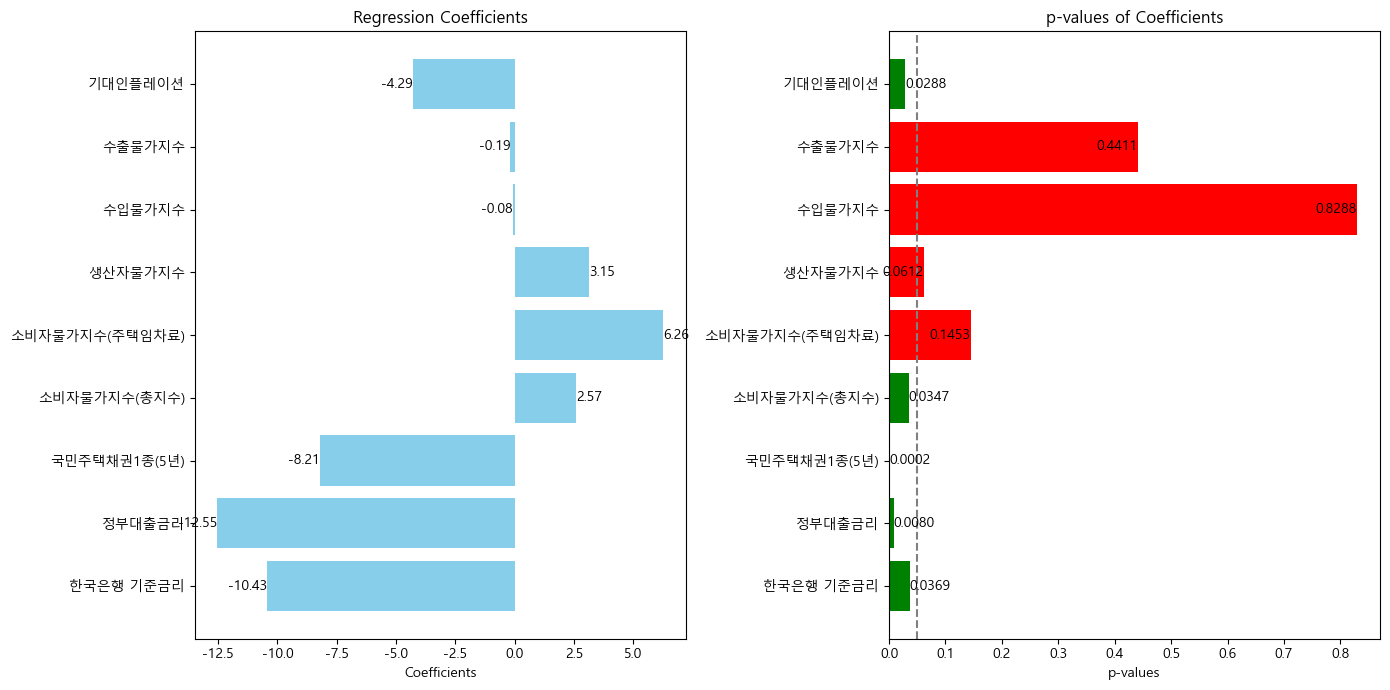

In [110]:
# 계수 및 p-value 시각화
coefficients = results.params.drop('const')
p_values = results.pvalues.drop('const')
labels = coefficients.index

plt.figure(figsize=(14, 7))

# 계수 플롯
plt.subplot(1, 2, 1)
bars = plt.barh(labels, coefficients, color='skyblue')
plt.xlabel('Coefficients')
plt.title('Regression Coefficients')

# 계수 값 레이블 추가
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='right' if bar.get_width() < 0 else 'left')

# p-value 플롯
plt.subplot(1, 2, 2)
colors = np.where(p_values < 0.05, 'green', 'red')  # p-value가 0.05 미만이면 녹색, 아니면 적색
bars = plt.barh(labels, p_values, color=colors)
plt.axvline(x=0.05, color='grey', linestyle='--')
plt.xlabel('p-values')
plt.title('p-values of Coefficients')

# p-value 값 레이블 추가
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', 
             va='center', ha='right' if bar.get_width() > 0.05 else 'left')

plt.tight_layout()
plt.show()


In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# '소비자물가지수(전세)', '소비자물가지수(월세)' 변수 제거
X_reduced = X
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# PCA 적용
pca = PCA(n_components=5)  # 5개의 주성분 사용
X_pca = pca.fit_transform(X_scaled)

# Ridge 회귀 모델 피팅
ridge_model = Ridge(alpha=1.0)  # alpha는 규제의 강도를 조절
ridge_model.fit(X_pca, y)

# 회귀 결과 출력
ridge_coef = ridge_model.coef_
ridge_intercept = ridge_model.intercept_

# PCA 결과와 Ridge 회귀 결과 해석
pca_explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(pca_explained_variance_ratio)

print("PCA Explained Variance Ratio:", pca_explained_variance_ratio)
print("Total Explained Variance by PCA Components:", total_explained_variance)
print("Ridge Regression Coefficients:", ridge_coef)
print("Ridge Regression Intercept:", ridge_intercept)


PCA Explained Variance Ratio: [0.84198837 0.10662418 0.02949038 0.01080224 0.00819467]
Total Explained Variance by PCA Components: 0.9970998368259023
Ridge Regression Coefficients: [  3.57318216  18.58237619 -24.66408624  -3.25891663   1.43096884]
Ridge Regression Intercept: 147.50675675675674


In [59]:
# PCA 구성요소의 각 변수에 대한 가중치 (loadings)
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(5)], index=X_reduced.columns)

# Ridge 회귀 계수를 주성분의 원래 변수에 역변환
ridge_coef_original = pca.components_.T @ ridge_coef

# Ridge 회귀 결과를 DataFrame으로 정리
ridge_results = pd.DataFrame({
    'Original Variable': X_reduced.columns,
    'PCA Loading PC1': pca_loadings['PC1'],
    'PCA Loading PC2': pca_loadings['PC2'],
    'PCA Loading PC3': pca_loadings['PC3'],
    'PCA Loading PC4': pca_loadings['PC4'],
    'PCA Loading PC5': pca_loadings['PC5'],
    'Ridge Coefficient (Original)': ridge_coef_original
})

ridge_results


,Original Variable,PCA Loading PC1,PCA Loading PC2,PCA Loading PC3,PCA Loading PC4,PCA Loading PC5,Ridge Coefficient (Original)
const,const,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
한국은행 기준금리,한국은행 기준금리,0.318222,-0.474510,0.141340,0.213257,-0.203645,-12.152894
정부대출금리,정부대출금리,0.286582,-0.616506,-0.027561,0.315419,-0.070583,-10.881290
국민주택채권1종(5년),국민주택채권1종(5년),0.345236,-0.092793,0.363964,-0.207419,0.814275,-7.626407
소비자물가지수(총지수),소비자물가지수(총지수),0.346967,0.007373,-0.553757,0.067214,0.138978,15.014523
소비자물가지수(주택임차료),소비자물가지수(주택임차료),0.347010,0.182744,-0.413765,-0.238094,0.004723,15.623564
생산자물가지수,생산자물가지수,0.352160,0.178761,-0.327199,0.022906,0.007034,12.585609
수입물가지수,수입물가지수,0.319505,0.430050,0.367544,0.299807,-0.017163,-0.933759
수출물가지수,수출물가지수,0.332650,0.360464,0.234435,0.362523,-0.262874,0.547157
기대인플레이션,기대인플레이션,0.346208,-0.076604,0.268025,-0.727304,-0.449130,-5.069494


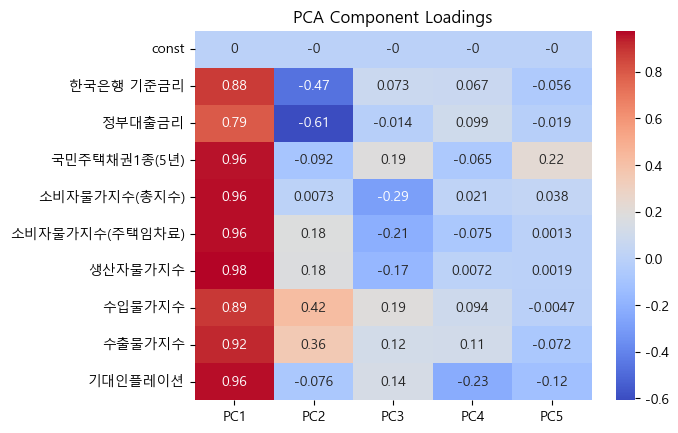

Detailed Ridge Regression Coefficients:
Component 1: Coefficient = 3.57
Component 2: Coefficient = 18.58
Component 3: Coefficient = -24.66
Component 4: Coefficient = -3.26
Component 5: Coefficient = 1.43


In [61]:
import numpy as np

# PCA 로딩 계산
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로딩을 데이터프레임으로 변환
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=X_reduced.columns)

# 로딩 시각화
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title('PCA Component Loadings')
plt.show()

# 릿지 회귀 결과 상세 분석
print("Detailed Ridge Regression Coefficients:")
for idx, coef in enumerate(ridge_coef):
    print(f"Component {idx + 1}: Coefficient = {coef:.2f}")


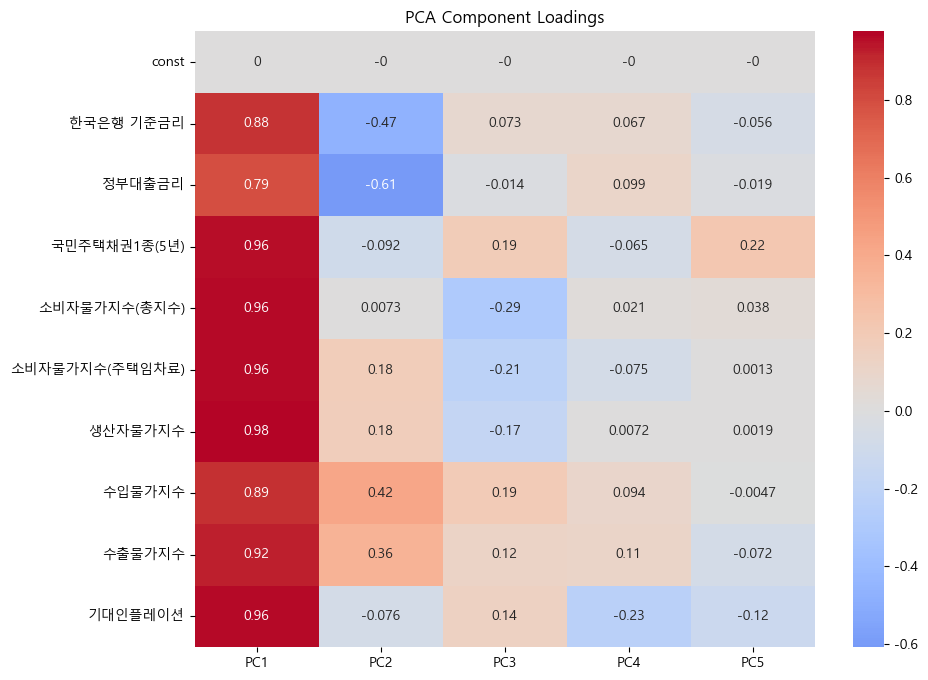

Detailed Ridge Regression Coefficients:
Component 1: Coefficient = 3.57
Component 2: Coefficient = 18.58
Component 3: Coefficient = -24.66
Component 4: Coefficient = -3.26
Component 5: Coefficient = 1.43


In [62]:
# PCA 로딩 계산
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로딩을 데이터프레임으로 변환
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=X_reduced.columns)

# 로딩 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

# 릿지 회귀 결과 상세 분석
print("Detailed Ridge Regression Coefficients:")
for idx, coef in enumerate(ridge_coef):
    print(f"Component {idx + 1}: Coefficient = {coef:.2f}")

